# Explore here

In [2]:
import pandas as pd
import csv
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/medical_insurance_cost.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)

In [4]:
df = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
n_unicos = df.nunique()
n_unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
print(df.duplicated().sum())

1


In [7]:
df[df.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.isnull().any(axis=1).mean()*100)
print(df.isnull().mean()*100)

0.0
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


<Axes: >

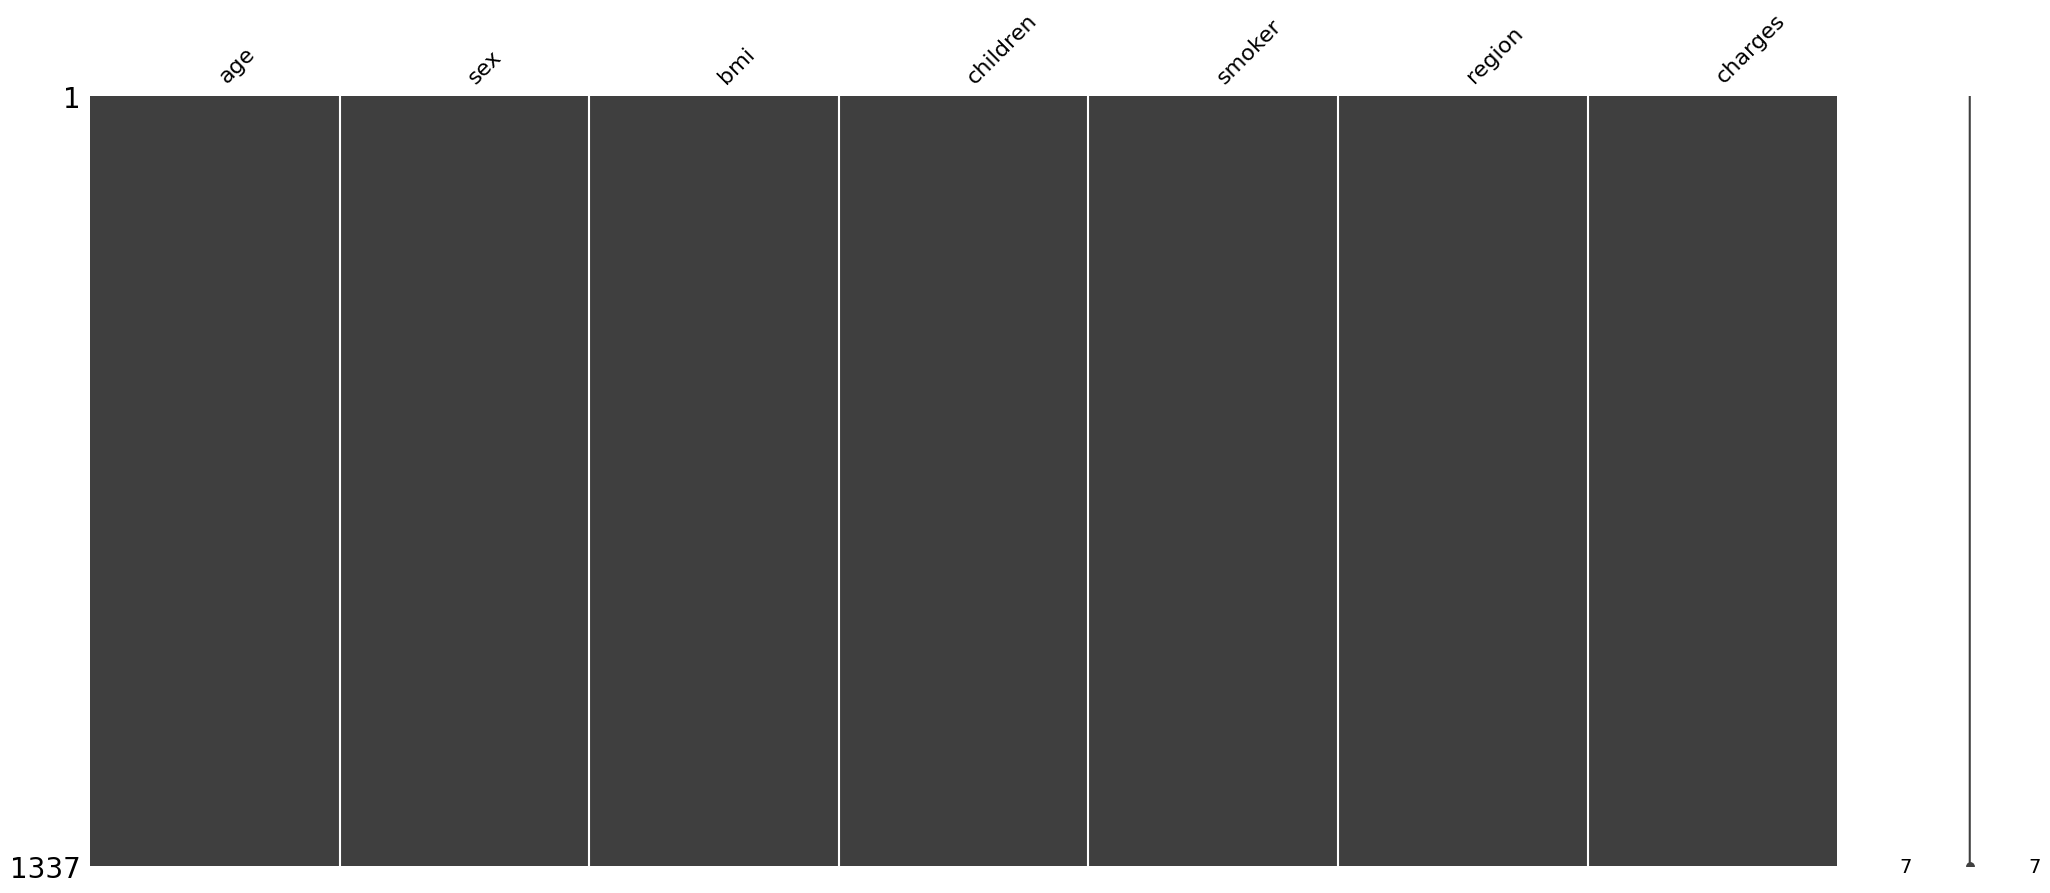

In [11]:
msno.matrix(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


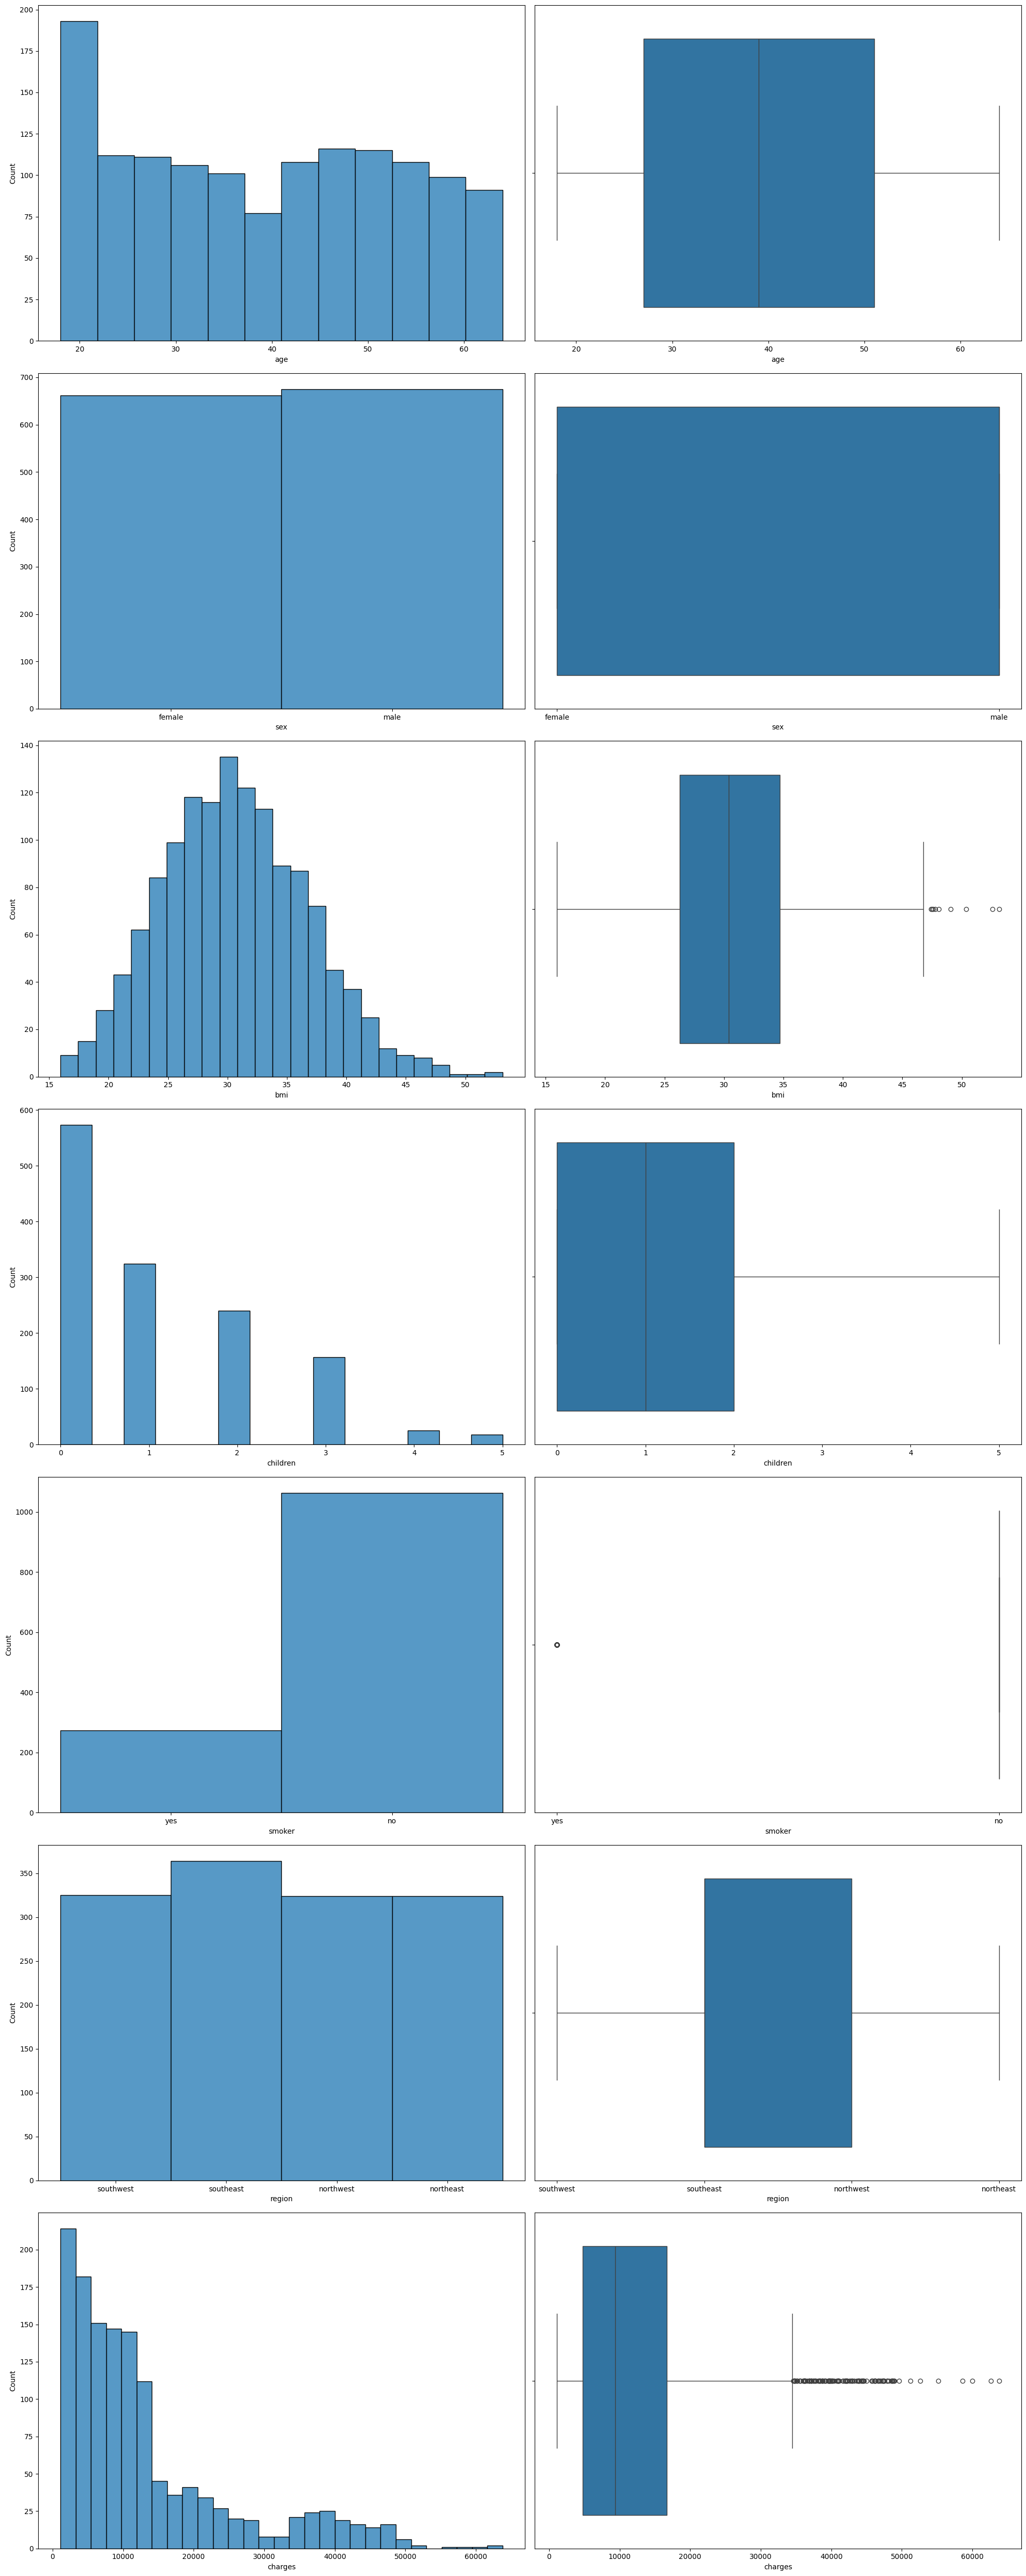

In [13]:
'''
Obtengo gráficas de todos los campos.
'''

fig, axis = plt.subplots(7, 2, figsize=(20, 50))

sns.histplot(ax = axis[0,0], data = df, x = "age")
sns.histplot(ax = axis[1,0], data = df, x = "sex")
sns.histplot(ax = axis[2,0], data = df, x = "bmi")
sns.histplot(ax = axis[3,0], data = df, x = "children")
sns.histplot(ax = axis[4,0], data = df, x = "smoker")
sns.histplot(ax = axis[5,0], data = df, x = "region")
sns.histplot(ax = axis[6,0], data = df, x = "charges")

sns.boxplot(ax = axis[0,1], data = df, x = "age")
sns.boxplot(ax = axis[1,1], data = df, x = "sex")
sns.boxplot(ax = axis[2,1], data = df, x = "bmi")
sns.boxplot(ax = axis[3,1], data = df, x = "children")
sns.boxplot(ax = axis[4,1], data = df, x = "smoker")
sns.boxplot(ax = axis[5,1], data = df, x = "region")
sns.boxplot(ax = axis[6,1], data = df, x = "charges")

plt.tight_layout()

plt.show()

In [14]:
print(df[df["charges"]==0].count())

#print(df[df["charges"]==0])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
df['log_charges'] = np.log(df['charges'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


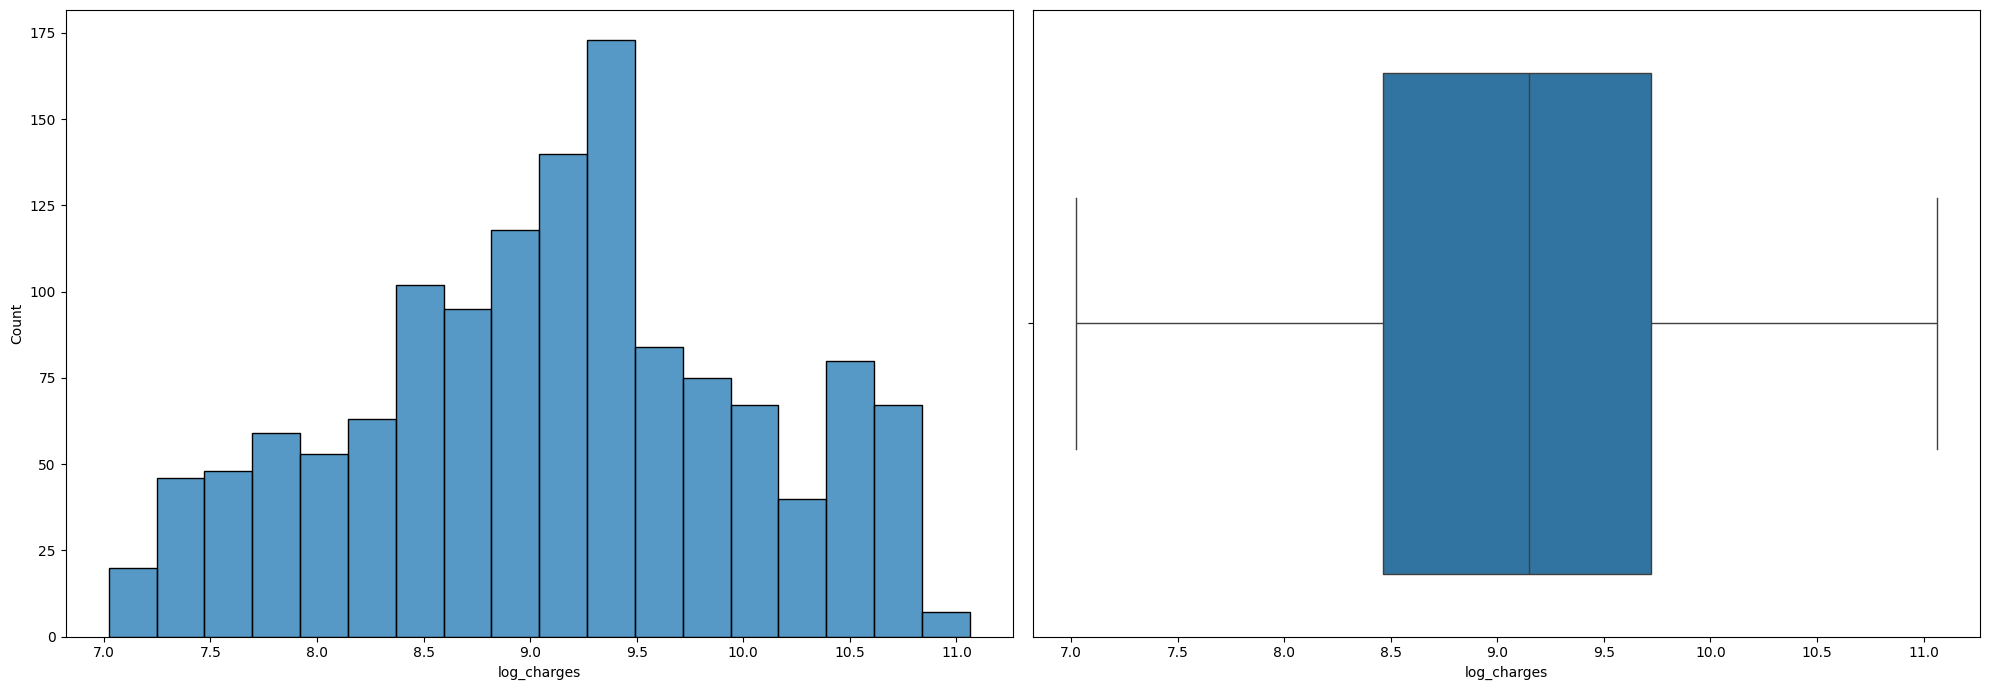

In [17]:
#Hacemos el logaritmo de los cargos para aproximarlo a una distribución normal

fig, axis = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axis[0], data = df, x = "log_charges")
sns.boxplot(ax = axis[1], data = df, x = "log_charges")

plt.tight_layout()
plt.show()

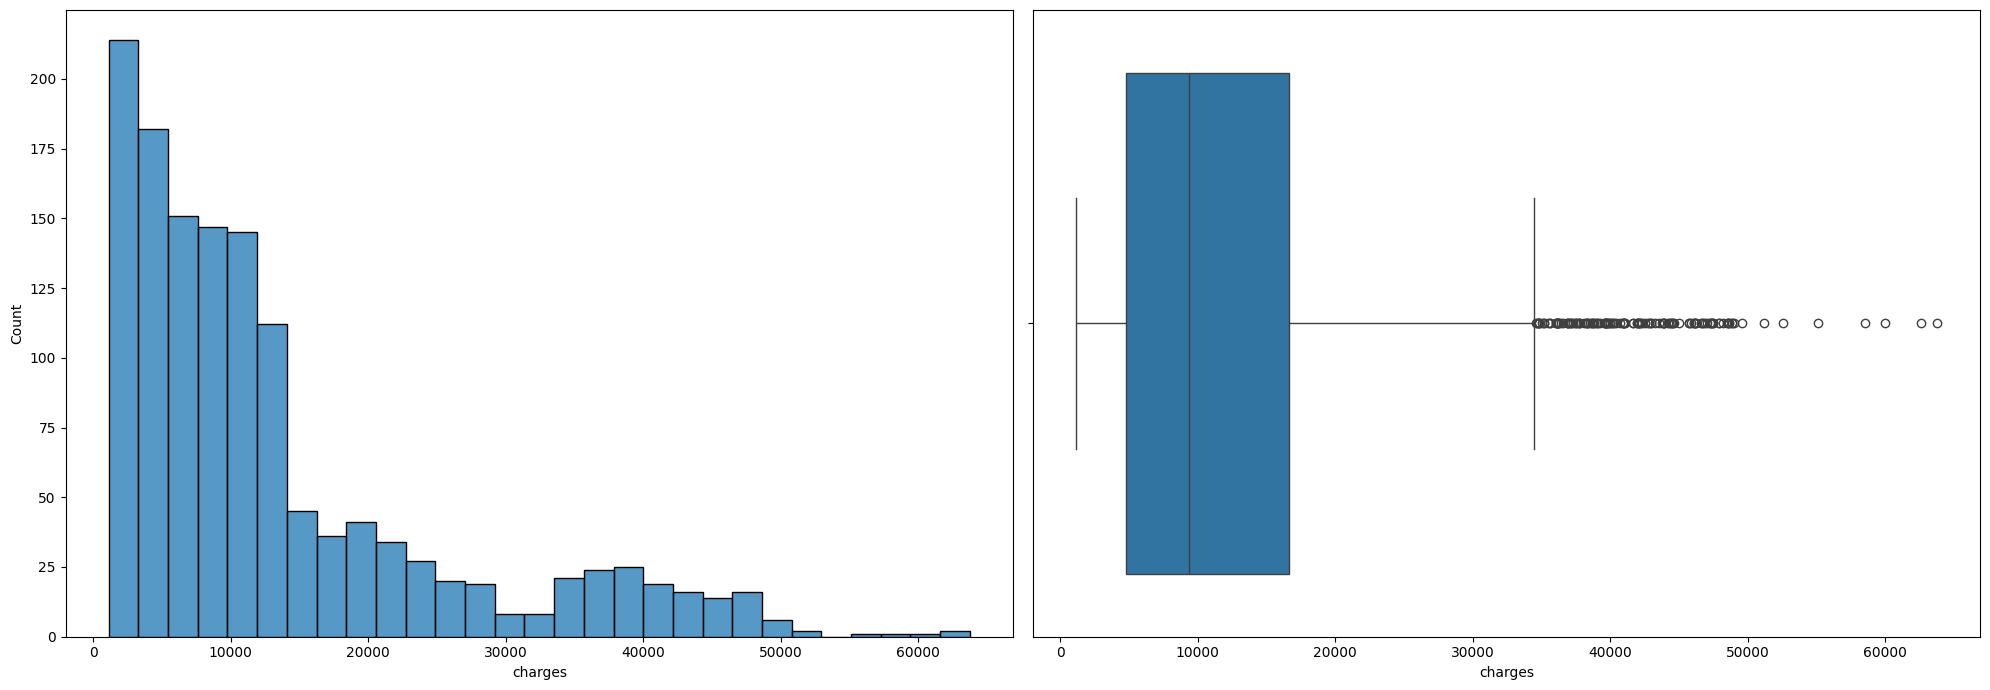

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axis[0], data = df, x = "charges")
sns.boxplot(ax = axis[1], data = df, x = "charges")

plt.tight_layout()
plt.show()

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [20]:
df.loc[df["smoker"] == "yes" , 'smoker_f'] = 1
df.loc[df["smoker"] == "no" , 'smoker_f'] = 0

In [21]:
df.loc[df["sex"] == "female" , 'sex_f'] = 1
df.loc[df["sex"] == "male" , 'sex_f'] = 0

In [22]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
for location in df["region"].unique():
    df.loc[df["region"] == location, 'region_f'] = df['region'].value_counts().get(location, 0)/len(df)*100

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,smoker_f,sex_f,region_f
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,1.0,1.0,24.308153
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,0.0,0.0,27.225131
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,0.0,0.0,27.225131
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,0.0,0.0,24.233358
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,0.0,0.0,24.233358


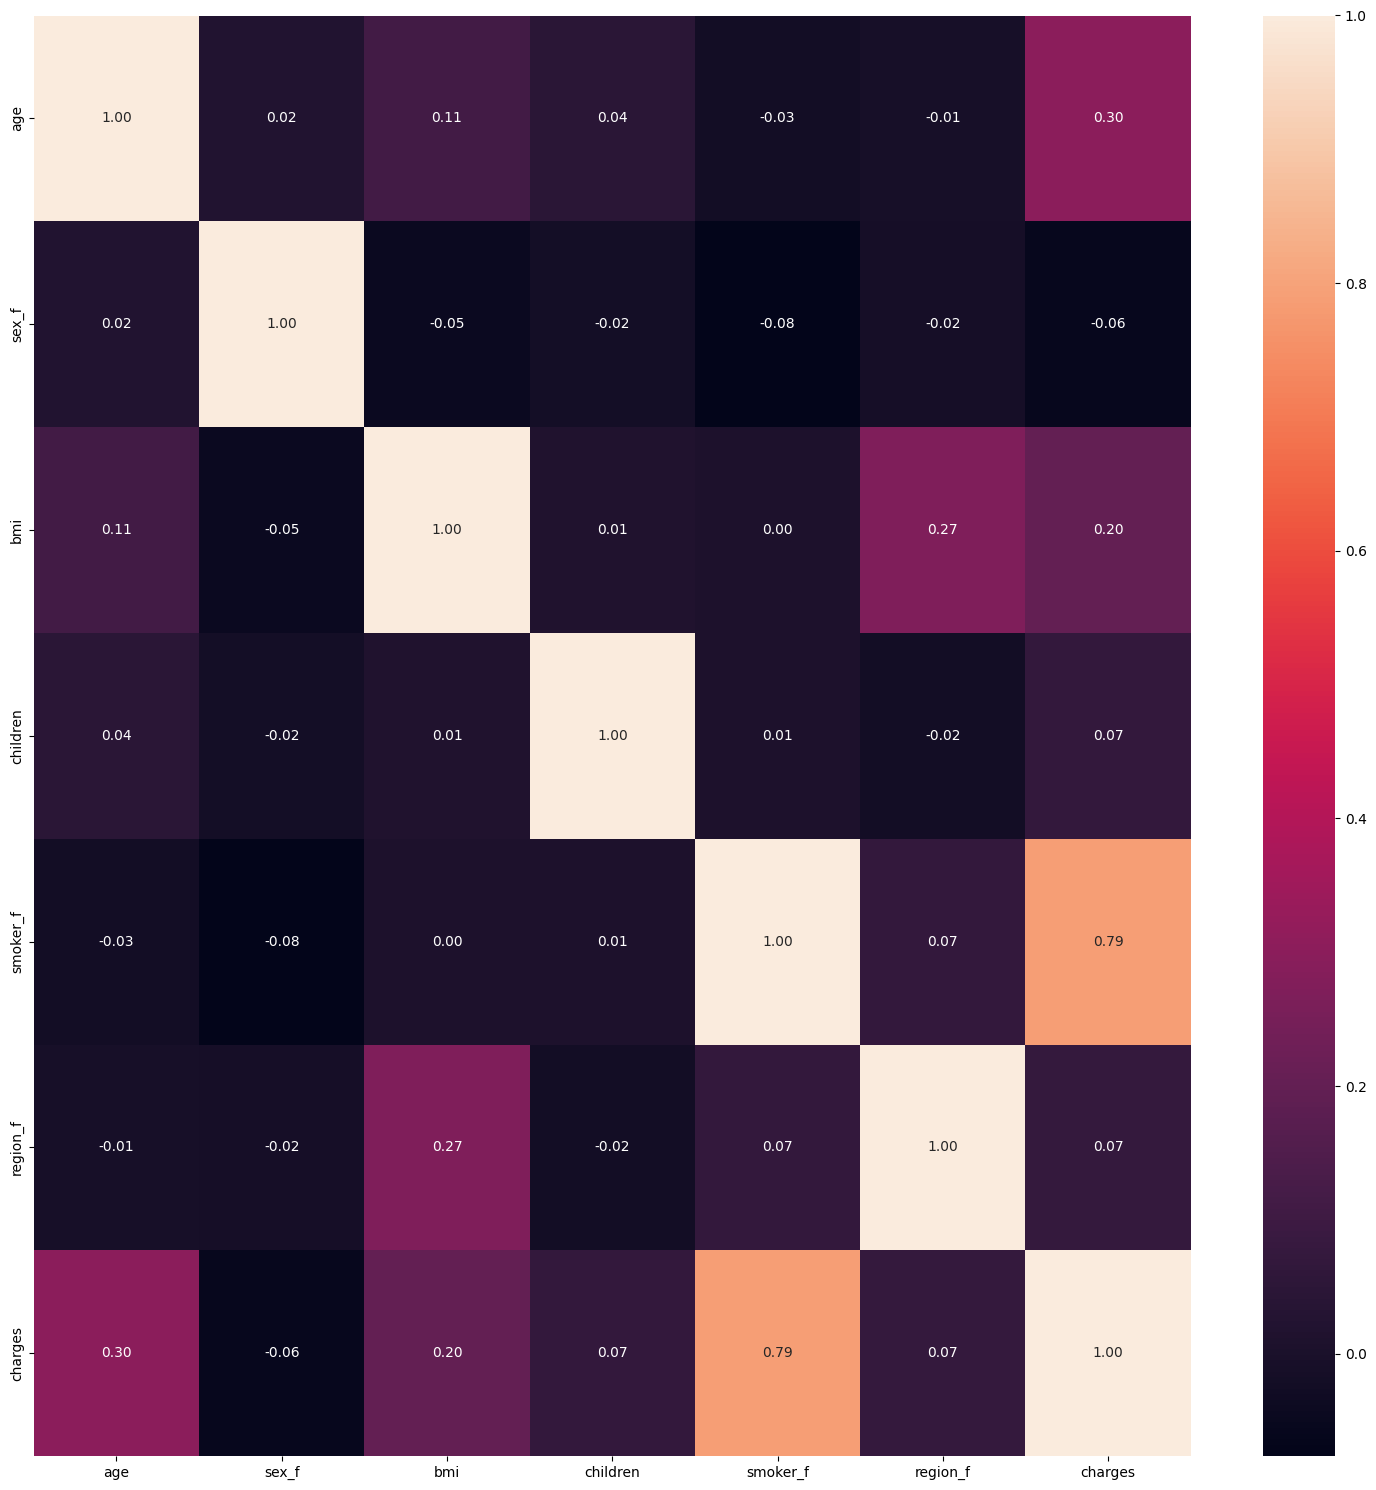

In [25]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["age", "sex_f", "bmi", "children", "smoker_f",	
                        "region_f", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Las correlaciones más relevantes del heatmap son entre región y bmi, lo cual tiene sentido porque regiones más empobrecidas tienen un bmi más alto.
Las variables más relacionadas con los cargos son edad, bmi y fumador

In [26]:
X = df.drop(['charges','log_charges','region','smoker', 'sex'], axis=1)
y = df['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,age,bmi,children,smoker_f,sex_f,region_f
0,19,27.900,0,1.0,1.0,24.308153
1,18,33.770,1,0.0,0.0,27.225131
2,28,33.000,3,0.0,0.0,27.225131
3,33,22.705,0,0.0,0.0,24.233358
4,32,28.880,0,0.0,0.0,24.233358


In [27]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

'''
La region, el sexo y el bmi no son importantes, sin embargo bmi está bastante relacionada con los dargos en el heatmap, por lo que la mantendría
'''

    Feature  Importance
3  smoker_f   86.224754
0       age    6.765848
2  children    2.805593
1       bmi    1.537836
5  region_f    1.336634
4     sex_f    1.329340


'\nLa region, el sexo y el bmi no son importantes, sin embargo bmi está bastante relacionada con los dargos en el heatmap, por lo que la mantendría\n'

In [28]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

#Todas las variables tiene un valor bastante cercano de influencia en el resto

age         1.098859
bmi         1.449533
children    1.017162
smoker_f    1.068046
sex_f       1.042362
region_f    1.394541
dtype: float64

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,smoker_f,sex_f,region_f
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,1.0,1.0,24.308153
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,0.0,0.0,27.225131
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,0.0,0.0,27.225131
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,0.0,0.0,24.233358
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,0.0,0.0,24.233358


In [30]:
df1 = df.drop(['sex','sex_f','region','region_f','smoker'], axis=1)


In [31]:
df1.head()

,age,bmi,children,charges,log_charges,smoker_f
0,19,27.900,0,16884.92400,9.734176,1.0
1,18,33.770,1,1725.55230,7.453302,0.0
2,28,33.000,3,4449.46200,8.400538,0.0
3,33,22.705,0,21984.47061,9.998092,0.0
4,32,28.880,0,3866.85520,8.260197,0.0


In [32]:
X = df1.drop(['charges','log_charges'], axis=1)
y = df1['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
print(X.duplicated().sum())

#Al eliminar columnas hay duplicados, pero no sé si estos se deberían eliminar

6


In [34]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

#El VIF se ve ligeramente modificado, pero poco, después de quitar sexo y niños

age         1.081607
bmi         1.062858
children    1.014884
smoker_f    1.008686
dtype: float64

In [35]:
# Ajusta un modelo de regresión lineal
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

print(cooks_distance[0])


[0.00035948 0.0011492  0.00015721 ... 0.00157122 0.00045319 0.00295783]


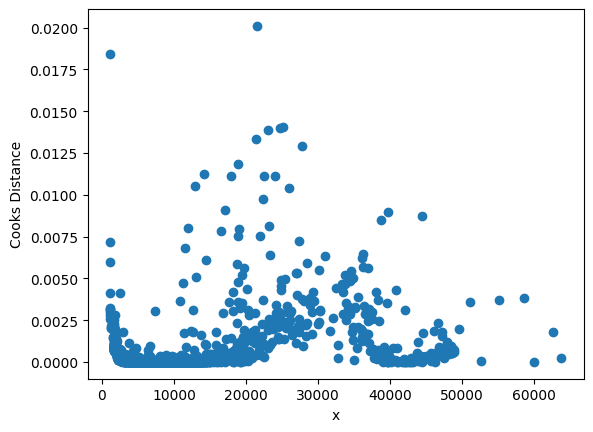

In [36]:
plt.scatter(df1.charges, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()


In [37]:
print(np.where(cooks_distance[0]>0.015))

(array([1026, 1316]),)


In [38]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df1)

print(pto_corte)

# Viviendas por encima del pto de corte
#print((np.where(cooks_distance[0]>pto_corte)[0]))

df1.drop(np.where(cooks_distance[0]>pto_corte)[0],inplace=True)

0.0029917726252804786


In [39]:
print(len(df1))
print(len(df))

1228
1337


In [40]:
#Separamos la variable dependiente de las independientes (y las variables no factorizadas) con el nuevo dataframe 
X = df1.drop(['charges','log_charges'], axis=1)
y = df1['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index(['smoker_f'], dtype='object')

In [50]:
# seleciono las columnas que no son binarias
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [51]:
# Instancio la clase del escalador y lo ajusto con los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train_num)

In [52]:
# Trasnformamos los datos numericos con el escalador ajustado
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [53]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [56]:
X_cons = sm.add_constant(X_train_sc)
model = sm.OLS(y_train.values, X_cons)

# Ajustar el modelo a los datos
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1190.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:33:20   Log-Likelihood:                -428.26
No. Observations:                 982   AIC:                             866.5
Df Residuals:                     977   BIC:                             891.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6844      0.035    219.631      0.0

Podemos osbservar que la variable clave en el precio es la de ser fumador o no, seguida de los hijos y la edad

In [57]:
residuos = results.resid

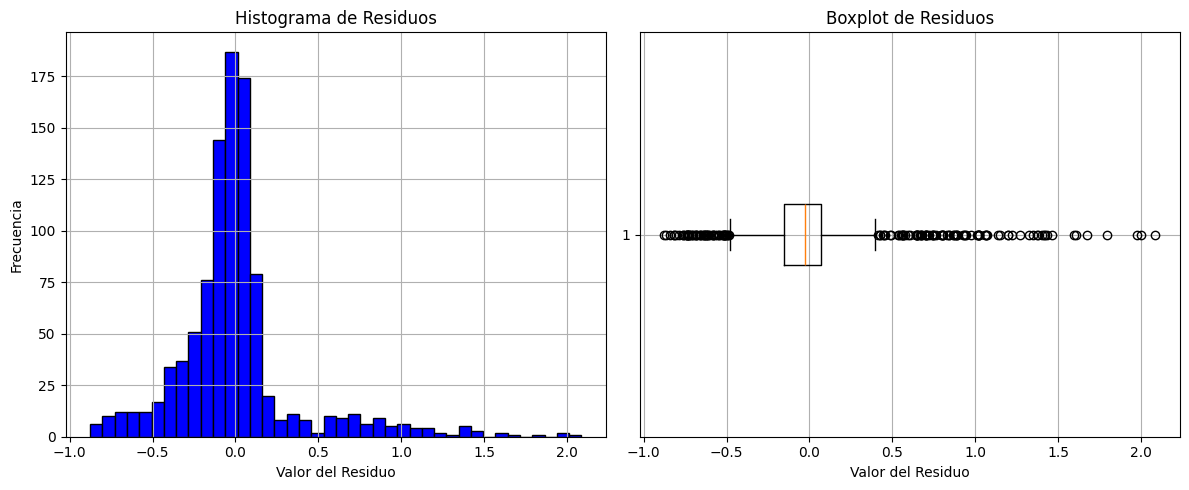

In [58]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

In [61]:
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

In [62]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 7.684396262632195
Coeficientes (b1, b2): [1.76782357 0.29828427 0.58574036 1.56729215]


In [64]:
y_pred = model.predict(X_test_sc)

In [65]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.14634964236435777
Coeficiente de determinación: 0.8156279754677214


El porcentaje de aciertos es del 81.5%, lo cual es bastante alto, y sería una predicción razonablemente acertada.